In [1]:
import struct
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

dpi=100

In [2]:
filename = input("Enter the data file name (ext = .dat): ")+".dat";
print()

Enter the data file name (ext = .dat):  run001


In [32]:
filename = "run001.dat"

In [33]:
def header(file):
    struct.unpack('i',file.read(4))
    
def unpack_float(file, dims=(1)):
    if dims==(1):
        return struct.unpack('d',file.read(8))[0]
    else:
        dtype = np.dtype(np.float64)
        dtype = dtype.newbyteorder('<')
        return np.frombuffer(file.read(8*np.product(dims))).reshape(dims)

def unpack_int(file):
    return struct.unpack('i',file.read(4))[0]

class channel():
    pass
    
with open(filename, mode="rb") as file:
    header(file)
    channel.nout = unpack_int(file)
    channel.tend = unpack_float(file)
    header(file)
    header(file)
    channel.mx = unpack_int(file)
    channel.my = unpack_int(file)
    channel.meqn = unpack_int(file)
    channel.mbc = unpack_int(file)
    header(file)
    header(file)
    channel.dt = unpack_float(file)
    channel.dx = unpack_float(file)
    channel.dy = unpack_float(file)
    gamma = unpack_float(file)
    channel.cf = unpack_float(file)
    channel.cb = unpack_float(file)
    header(file)
    header(file)
    channel.ixbc = unpack_int(file)
    channel.iybc = unpack_int(file)
    header(file)
    header(file)
    channel.x = unpack_float(file, dims=(channel.mx,1))
    header(file)
    header(file)
    channel.y = unpack_float(file, dims=(channel.my,1))
    header(file)
    header(file)
    channel.b = unpack_float(file, dims=(channel.my,channel.mx))
    header(file)
    header(file)
    channel.cbxy = unpack_float(file, dims=(channel.my,channel.mx))
    header(file)
    
    channel.t = np.zeros((channel.nout))
    channel.h = np.zeros((channel.nout, channel.my, channel.mx))
    channel.qu = np.zeros((channel.nout, channel.my, channel.mx))
    channel.qv = np.zeros((channel.nout, channel.my, channel.mx))
    
    for i in range(channel.nout):
        try:
            header(file)
            channel.t[i] = unpack_float(file)
            header(file)
            header(file)
            channel.h[i,:,:] = unpack_float(file, dims=(channel.my,channel.mx))
            header(file)
            header(file)
            channel.qu[i,:,:] = unpack_float(file, dims=(channel.my,channel.mx))
            header(file)
            header(file)
            channel.qv[i,:,:] = unpack_float(file, dims=(channel.my,channel.mx))
            header(file)
        except:
            print("Broken file")
            break
    
    channel.x = channel.x[:,0][np.newaxis,:]
    channel.y = channel.y[:,0][:,np.newaxis]
    
    channel.u = channel.qu/channel.h
    channel.v = channel.qv/channel.h
    channel.u[channel.h < 0.001] = np.nan
    channel.v[channel.h < 0.001] = np.nan
    channel.qu[channel.h < 0.001] = np.nan
    channel.qv[channel.h < 0.001] = np.nan
    channel.h[channel.h < 0.001] = np.nan
    channel.eta = channel.h + channel.b
    

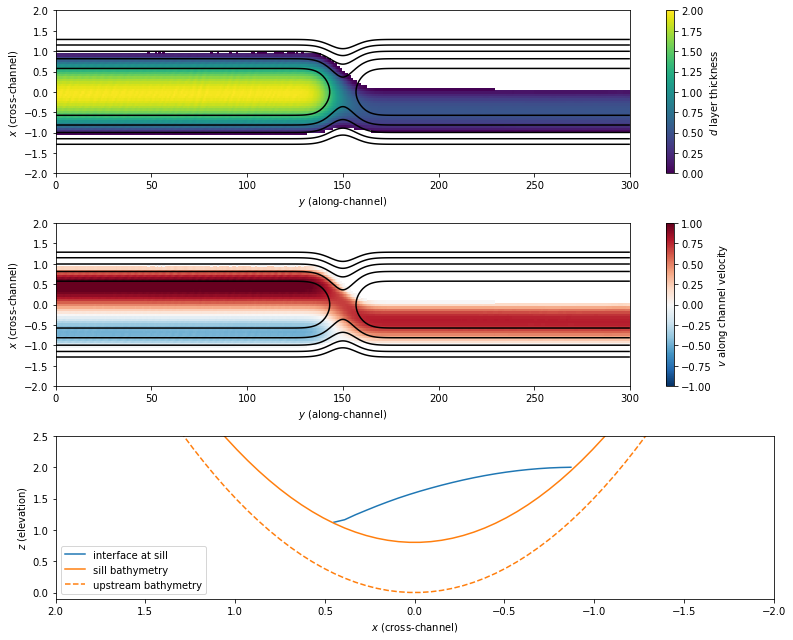

In [35]:
i = 100
plt.figure(1,figsize=(11,9))
plt.clf()
plt.subplot(3,1,1)
q = plt.pcolor(channel.x,channel.y,channel.h[i,:,:])
plt.contour(channel.x.squeeze(),channel.y.squeeze(),channel.b,levels=np.arange(0,3.,0.5),colors="k")
plt.colorbar(q, label=r'$d$ layer thickness')
q.set_clim([0,2.0])
plt.ylim([-2,2])
plt.xlim([0,300])
plt.ylabel(r"$x$ (cross-channel)")
plt.xlabel(r"$y$ (along-channel)")

plt.subplot(3,1,2)
q = plt.pcolor(channel.x,channel.y,channel.qu[i,:,:],cmap=plt.get_cmap("RdBu_r"))
plt.contour(channel.x.squeeze(),channel.y.squeeze(),channel.b,levels=np.arange(0,3.,0.5),colors="k")
plt.colorbar(q, label=r'$v$ along channel velocity')
q.set_clim([-1.0,1.0])
plt.ylim([-2,2])
plt.xlim([0,300])
plt.ylabel(r"$x$ (cross-channel)")
plt.xlabel(r"$y$ (along-channel)")

plt.subplot(3,1,3)
nxhalf = np.int64(channel.x.size/2.)
plt.plot(channel.y,channel.h[i,:,nxhalf]+channel.b[:,nxhalf],"C0-",label='interface at sill')
plt.plot(channel.y,channel.b[:,nxhalf],"C1-",label='sill bathymetry')
plt.plot(channel.y,channel.b[:,0],"C1--",label='upstream bathymetry')
plt.xlim([2,-2.])
plt.ylim([-0.1,2.5])
plt.legend()
plt.xlabel(r"$x$ (cross-channel)")
plt.ylabel(r"$z$ (elevation)")
plt.tight_layout()
plt.savefig("figures_run001/faroe_bank_simulation.png", bbox_inches='tight', dpi=150.)

(-0.1, 3.0)

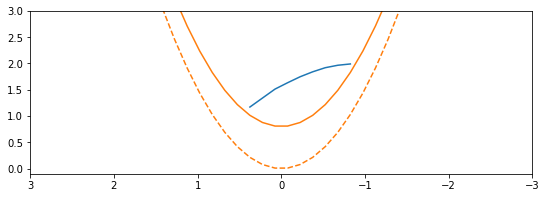

In [165]:
plt.figure(figsize=(9,3))
nxhalf = np.int64(channel.x.size/2.)
plt.plot(channel.y,channel.h[i,:,nxhalf]+channel.b[:,nxhalf],"C0-")
plt.plot(channel.y,channel.b[:,nxhalf],"C1-")
plt.plot(channel.y,channel.b[:,0],"C1--")
plt.xlim([3,-3.])
plt.ylim([-0.1,3.0])

0, 1, 

KeyboardInterrupt: 

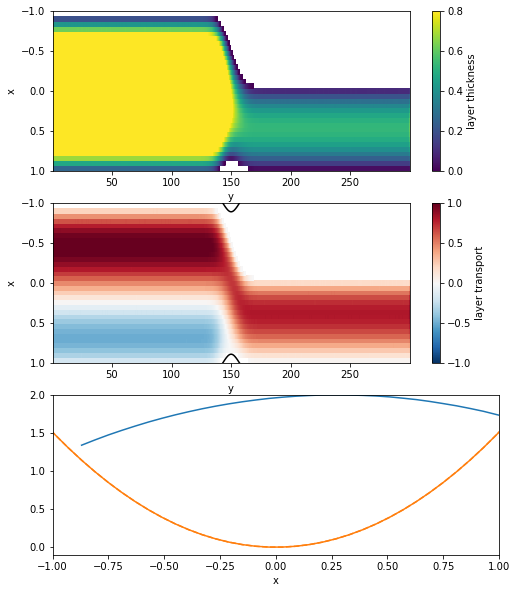

In [82]:
for i in range(channel.nout):
    print(i,end=", ")
    plt.figure(1,figsize=(8,10))
    plt.clf()
    plt.subplot(3,1,1)
    q = plt.pcolor(channel.x,-channel.y,channel.h[i,:,:])
    plt.contour(channel.x.squeeze(),-channel.y.squeeze(),channel.b,7,colors="w")
    plt.colorbar(q,label="layer thickness")
    plt.ylabel("x")
    plt.ylim([1.,-1.])
    plt.xlabel("y")
    q.set_clim([0,0.8])

    plt.subplot(3,1,2)
    q = plt.pcolor(channel.x,-channel.y,channel.qu[i,:,:],cmap=plt.get_cmap("RdBu_r"))
    plt.contour(channel.x.squeeze(),-channel.y.squeeze(),channel.b,7,colors="k")
    plt.colorbar(q,label="layer transport")
    plt.ylabel("x")
    plt.ylim([1.,-1.])
    plt.xlabel("y")
    q.set_clim([-1.0,1.0])
    
    plt.subplot(3,1,3)
    plt.plot(-channel.y,channel.h[i,:,300]+channel.b[:,300],"C0-")
    plt.plot(-channel.y,channel.b[:,300],"C1-")
    plt.plot(-channel.y,channel.b[:,0],"C1--")
    plt.xlim([-1.,1.])
    plt.ylim([-0.1,2.0])
    plt.xlabel("x")
    
    plt.savefig("figures_"+filename.split(".")[0]+"/"+str(i).zfill(4)+'.png',dpi=dpi,bbox_inches="tight")
    